In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#pip install feather-format
#scikit-learn


In [2]:
inputfilename = "D:/Temporary/datasets/RiskBasedAuthentication/rba-dataset.csv"

rba_df = pd.read_csv(inputfilename)



In [3]:
'''Create a feather file with all the changes done to the dataframe.
Thereafter use this feather file for reading data into dataframe. 
Feather format is 100 times faster in read/write compared to csv
rba_df.to_feather('D:/Temporary/datasets/RiskBasedAuthentication/rba-datasetfull.feather')

inputfilename = "D:/Temporary/datasets/RiskBasedAuthentication/rba-datasetfull.feather"
rba_df = pd.read_feather(inputfilename)'''

'Create a feather file with all the changes done to the dataframe.\nThereafter use this feather file for reading data into dataframe. \nFeather format is 100 times faster in read/write compared to csv\nrba_df.to_feather(\'D:/Temporary/datasets/RiskBasedAuthentication/rba-datasetfull.feather\')\n\ninputfilename = "D:/Temporary/datasets/RiskBasedAuthentication/rba-datasetfull.feather"\nrba_df = pd.read_feather(inputfilename)'

In [4]:
datetime_stamp = pd.to_datetime(rba_df['Login Timestamp'])
rba_df['year'] = datetime_stamp.dt.year
rba_df['month'] = datetime_stamp.dt.month
rba_df['day'] = datetime_stamp.dt.day
rba_df['hour'] = datetime_stamp.dt.hour
rba_df['minute'] = datetime_stamp.dt.minute
rba_df['second'] = datetime_stamp.dt.second
rba_df['millisecond'] = (datetime_stamp.dt.microsecond/1000).astype(int)


In [5]:

rba_df['Is Account Takeover']= rba_df['Is Account Takeover'].astype(int)
rba_df['Is Attack IP']= rba_df['Is Attack IP'].astype(int)
rba_df['Login Successful']= rba_df['Login Successful'].astype(int)
rba_df['Is Failed Login']=np.where(rba_df['Login Successful'] ==0, 1, 0)
rba_df['Login counter']=1
rba_df['Is Attack']=np.where(np.logical_or(rba_df['Is Attack IP'] ==1, rba_df['Is Account Takeover'] ==1), 1, 0)



In [6]:
'''rba_df.hist(bins=50, figsize=(20,15))
plt.show()'''

'rba_df.hist(bins=50, figsize=(20,15))\nplt.show()'

0    28172287
1     3096977
Name: Is Attack IP, dtype: int64

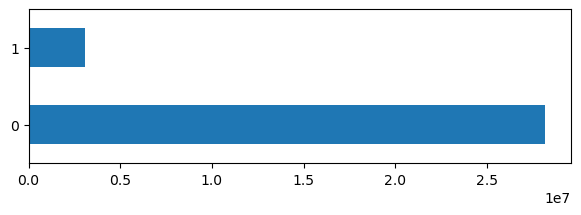

In [7]:
attack_ip = rba_df['Is Attack IP'].value_counts()
attack_ip.plot(kind='barh', figsize=(7,2), fontsize=10)
attack_ip

0    31269123
1         141
Name: Is Account Takeover, dtype: int64

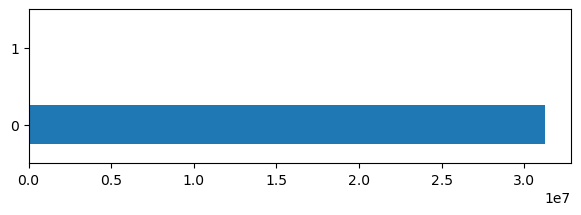

In [8]:
account_takeover = rba_df['Is Account Takeover'].value_counts()
account_takeover.plot(kind='barh', figsize=(7,2), fontsize=10)
account_takeover

0    28172223
1     3097041
Name: Is Attack, dtype: int64

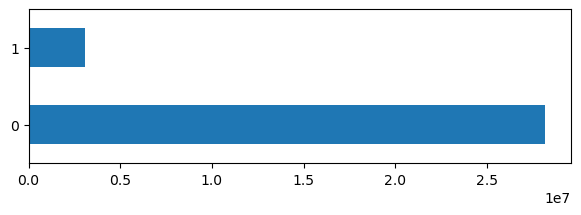

In [9]:
is_attack = rba_df['Is Attack'].value_counts()
is_attack.plot(kind='barh', figsize=(7,2), fontsize=10)
is_attack


In [10]:
rba_df.columns

Index(['index', 'Login Timestamp', 'User ID', 'Round-Trip Time [ms]',
       'IP Address', 'Country', 'Region', 'City', 'ASN', 'User Agent String',
       'Browser Name and Version', 'OS Name and Version', 'Device Type',
       'Login Successful', 'Is Attack IP', 'Is Account Takeover', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'millisecond',
       'Is Failed Login', 'Login counter', 'Is Attack'],
      dtype='object')

In [11]:
year_grouped_df = rba_df.groupby(['month'],as_index=False).sum()
year_grouped_df.head()

C:\Users\FFRAZ\AppData\Local\Temp\ipykernel_35488\3066614933.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_grouped_df = rba_df.groupby(['month'],as_index=False).sum()


,month,index,User ID,Round-Trip Time [ms],ASN,Login Successful,Is Attack IP,Is Account Takeover,year,day,hour,minute,second,millisecond,Is Failed Login,Login counter,Is Attack
0,1,85322652389185,-637428292967156098,59001241.0,534377937790,961586,330677,0,6266888585,44419795,37746587,91039446,90598286,1555043539,2139299,3100885,330677
1,2,68475467763965,-3481780057231574877,113174140.0,746485630796,1746949,472659,22,8501737040,64089113,52473389,123918041,125049431,2102978764,2460741,4207690,472668
2,3,6892221315603,-800407444762317096,68316934.0,322391368188,1040119,202921,11,4473942460,35676923,27804822,65321281,65595838,1106077015,1174704,2214823,202927
3,4,11531431687608,-8491553466441597667,62274829.0,347077949861,950387,221218,11,4390088220,33503198,26124226,63993601,64505720,1085766872,1222924,2173311,221222
4,5,16124386894875,8694576244879666190,64918549.0,320565216026,969517,199833,15,4359327660,33662068,26497338,63584196,64099415,1078273581,1188566,2158083,199841


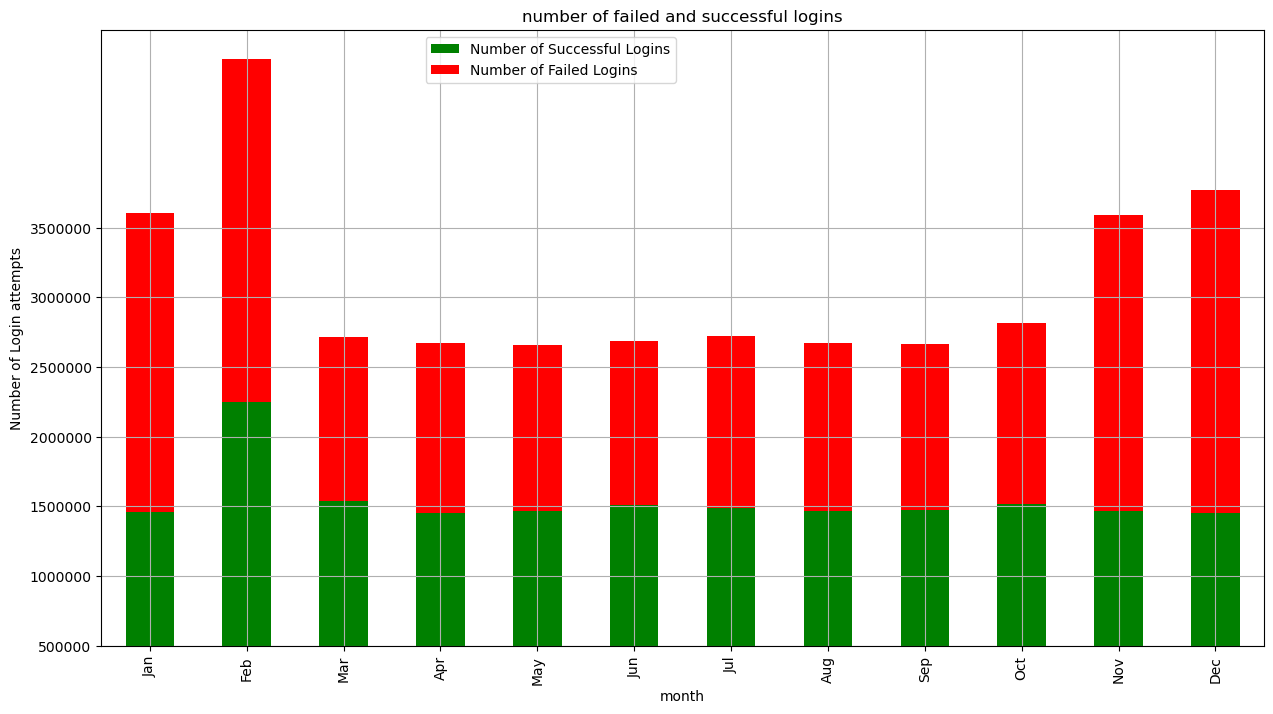

In [12]:
#axes= year_grouped_df.plot.bar(figsize=(15,8),x='month', y = ['Login counter','Login Successful','Is Failed Login'], grid=True, color =['blue','green','red'], stacked =True)
axes= year_grouped_df.plot.bar(figsize=(15,8),x='month', y = ['Login Successful','Is Failed Login'], grid=True, color =['green','red'], stacked =True)

axes.set(xlabel='month')
axes.set(ylabel='Number of Login attempts')
axes.set_title("number of failed and successful logins")
x_positions = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ]
y_positions_labels = [500000,1000000,1500000,2000000,2500000,3000000,3500000]
y_positions=np.arange(0, 3500000, 500000)
axes.set_xticklabels(x_positions)
axes.set_yticks(y_positions)
axes.set_yticklabels(y_positions_labels)
#axes.legend(loc='best', bbox_to_anchor=(0.5, 1),labels=['Total number of Logins(succes + failed)','Number of Successful Logins', 'Number of Failed Logins'])
axes.legend(loc='best', bbox_to_anchor=(0.5, 1),labels=['Number of Successful Logins', 'Number of Failed Logins'])


In [13]:
hour_grouped_df = rba_df.groupby(['month','day','hour'],as_index=False).sum().groupby('hour', as_index=False).mean()
hour_grouped_df.head()

C:\Users\FFRAZ\AppData\Local\Temp\ipykernel_35488\1962778201.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hour_grouped_df = rba_df.groupby(['month','day','hour'],as_index=False).sum().groupby('hour', as_index=False).mean()


,hour,month,day,index,User ID,Round-Trip Time [ms],ASN,Login Successful,Is Attack IP,Is Account Takeover,year,minute,second,millisecond,Is Failed Login,Login counter,Is Attack
0,0,6.513661,15.756831,2.052043e+10,-1.448735e+17,18433.647541,2.068047e+08,289.923497,102.560109,0.016393,2.435776e+06,35821.844262,35150.724044,6.030411e+05,915.795082,1205.718579,102.562842
1,1,6.513661,15.756831,2.462137e+10,5.568810e+16,11660.489071,3.141366e+08,336.398907,191.267760,0.008197,2.954750e+06,44878.316940,42785.767760,7.304676e+05,1126.218579,1462.617486,191.275956
2,2,6.513661,15.756831,3.095629e+10,-1.554820e+17,9714.562842,4.337295e+08,405.371585,297.748634,0.002732,3.642031e+06,53848.724044,52751.803279,9.008162e+05,1397.434426,1802.806011,297.751366
3,3,6.513661,15.756831,3.378128e+10,-4.726973e+17,11198.874317,4.928498e+08,457.819672,344.961749,0.002732,4.035787e+06,60103.961749,58571.161202,9.996039e+05,1539.901639,1997.721311,344.964481
4,4,6.513661,15.756831,3.818948e+10,4.313822e+17,20118.890710,5.621230e+08,590.647541,400.841530,0.005464,4.703379e+06,70545.355191,68335.636612,1.163931e+06,1737.549180,2328.196721,400.844262


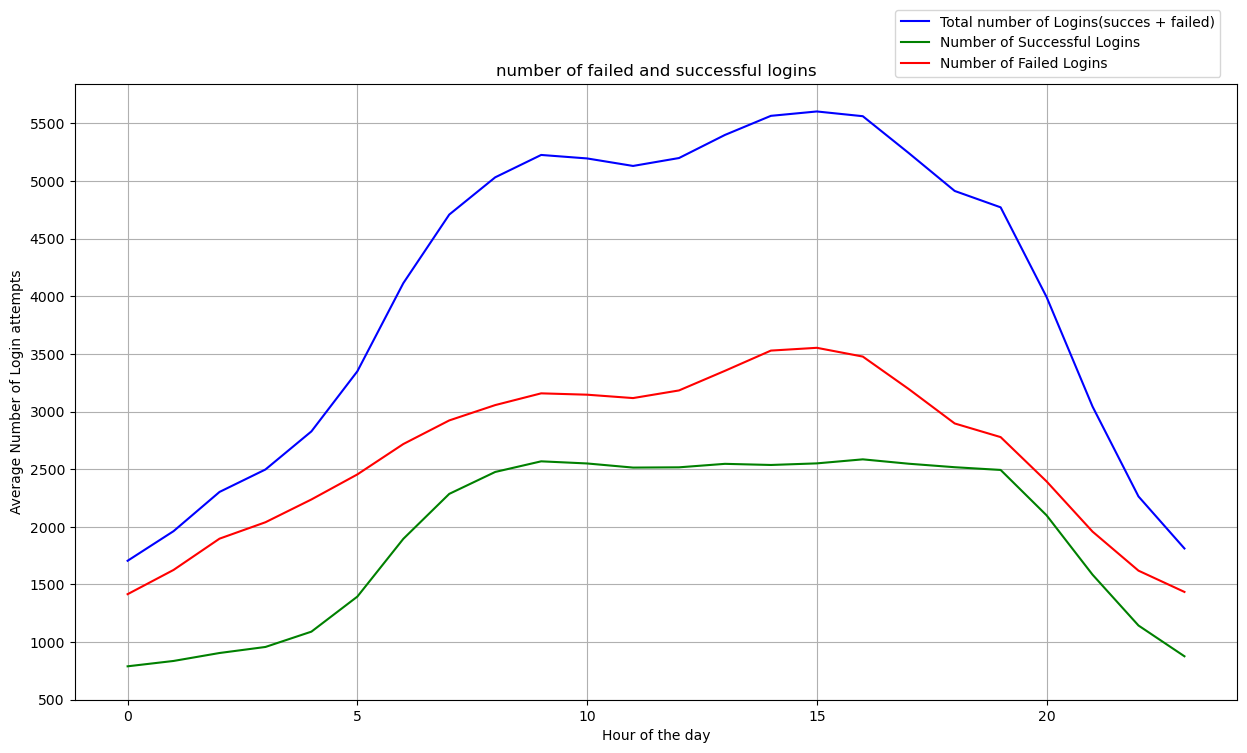

In [14]:
axes= hour_grouped_df.plot.line(figsize=(15,8),x='hour', y = ['Login counter','Login Successful','Is Failed Login'], grid=True, color =['blue','green','red'], stacked =False)
axes.set(xlabel='Hour of the day')
axes.set(ylabel='Average Number of Login attempts')
axes.set_title("number of failed and successful logins")
#x_positions = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ]
y_positions_labels = [500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500]
y_positions=np.arange(0, 5500, 500)
#axes.set_xticklabels(x_positions)
axes.set_yticks(y_positions)
axes.set_yticklabels(y_positions_labels)
axes.legend(loc='best', bbox_to_anchor=(0.7, 1),labels=['Total number of Logins(succes + failed)','Number of Successful Logins', 'Number of Failed Logins'])


In [15]:
minute_grouped_df = rba_df.groupby(['month','day','hour','minute'],as_index=False).sum().groupby('minute', as_index=False).mean()
minute_grouped_df.head()

C:\Users\FFRAZ\AppData\Local\Temp\ipykernel_35488\2431020899.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  minute_grouped_df = rba_df.groupby(['month','day','hour','minute'],as_index=False).sum().groupby('minute', as_index=False).mean()


,minute,month,day,hour,index,User ID,Round-Trip Time [ms],ASN,Login Successful,Is Attack IP,Is Account Takeover,year,second,millisecond,Is Failed Login,Login counter,Is Attack
0,0,6.513661,15.756831,11.5,9.877630e+08,4.856962e+16,1599.360542,1.005069e+07,24.114413,6.053165,0.000114,124674.602687,1815.318078,30876.897086,37.600296,61.714709,6.053165
1,1,6.513661,15.756831,11.5,9.271279e+08,-2.385507e+16,1662.746585,9.672695e+06,24.332536,5.849158,0.000228,121495.256034,1785.059312,30031.916781,35.808515,60.141052,5.849271
2,2,6.513661,15.756831,11.5,9.826925e+08,-4.167199e+16,1602.947291,1.030165e+07,24.004554,6.002277,0.000342,125652.956512,1800.710383,31086.517418,38.194672,62.199226,6.002277
3,3,6.513661,15.756831,11.5,8.904633e+08,-4.776131e+16,1618.412796,9.014077e+06,24.006148,5.863274,0.000228,115838.678165,1705.628301,28640.848702,33.334813,57.340961,5.863502
4,4,6.513661,15.756831,11.5,9.410596e+08,1.474650e+16,1604.624317,9.720472e+06,23.913821,6.026070,0.000342,120023.083447,1720.335952,29682.284039,35.498520,59.412341,6.026298


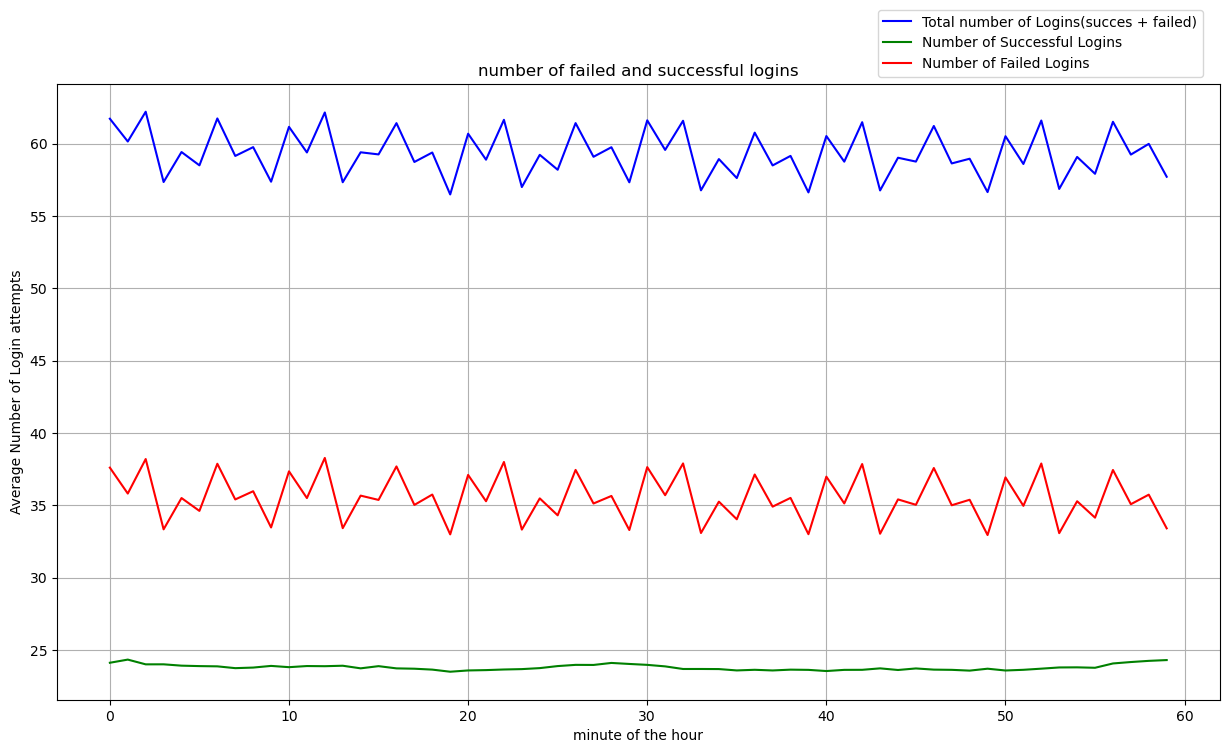

In [16]:
axes= minute_grouped_df.plot.line(figsize=(15,8),x='minute', y = ['Login counter','Login Successful','Is Failed Login'], grid=True, color =['blue','green','red'], stacked =False)
axes.set(xlabel='minute of the hour')
axes.set(ylabel='Average Number of Login attempts')
axes.set_title("number of failed and successful logins")
#x_positions = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec' ]
#y_positions_labels = [500,1000,1500,2000,2500,3000,3500]
#y_positions=np.arange(0, 3500, 500)
#axes.set_xticklabels(x_positions)
#axes.set_yticks(y_positions)
#axes.set_yticklabels(y_positions_labels)
axes.legend(loc='best', bbox_to_anchor=(0.7, 1),labels=['Total number of Logins(succes + failed)','Number of Successful Logins', 'Number of Failed Logins'])


In [17]:
#stratified sampling based on the "is_attack" column
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.01, test_size=0.001, random_state=42)
for train_index, test_index in split.split(rba_df, rba_df["Is Attack"]):
    strat_train_set = rba_df.loc[train_index]
    strat_test_set = rba_df.loc[test_index]

In [18]:
print(len(strat_test_set))
print(len(strat_train_set))

31270
312692


In [19]:
strat_test_set['Is Attack'].value_counts()

0    28173
1     3097
Name: Is Attack, dtype: int64

### It would make more sense to stratify based on users. A sample of data from the 33 million records, corresponding to all login attempts through the year of a list of users(who have few or more login attempts that are marked as attack) would have been useful in doing more user based behavior analysis. Again, this is something that requires good computation power. 

##### For simplicity, I have kept the analysis to all users in general and not for specific users, and have stratified the dataset based on the percentage of attack data available, maintaining the same ratio of attack versus benign in the sample train and test sets

In [20]:
print(3097041/28172223)
print(30970/281722)
print(3097/28173)

0.10993243238206654
0.10993106679634533
0.1099279451957548


In [21]:
strat_test_set.to_csv("dataset/rba_test.csv")
strat_train_set.to_csv("dataset/rba_train.csv")